In [4]:
!pip install tesseract
!pip install pytesseract

!sudo apt install tesseract-ocr

try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

import pytesseract
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,920 kB/s)
debconf: unable to initi

In [5]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

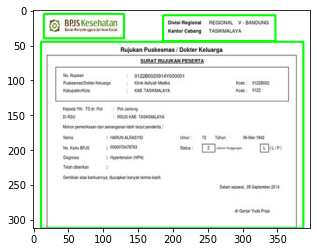

In [16]:

# Import required packages
import cv2
import pytesseract
import matplotlib.pyplot as plt
  
# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'
  
# Read image from which text needs to be extracted
img = cv2.imread("/content/Picture2.jpg")
  
# Preprocessing the image starts
  
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
  
# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect 
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
  
# Appplying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
  
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
  
# Creating a copy of image
im2 = img.copy()
  
# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()
  
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
      
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
      
    # Open the file in append mode
    file = open("recognized.txt", "a")
      
    # Apply OCR on the cropped image
    # text = pytesseract.image_to_string(cropped)
      
    # Appending the text into file
    # file.write(text)
    # file.write("\n")
      
    # Close the file
    file.close

plt.imshow(im2)

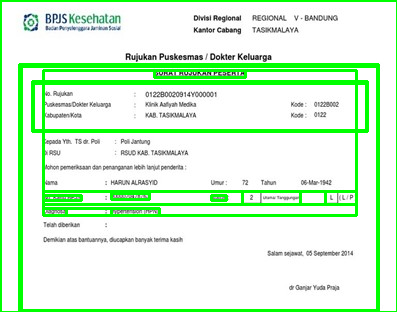

-1

In [9]:
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Picture2.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)